<a href="https://colab.research.google.com/github/MohammadAhmadSiddiqui/Capgemini-Training-/blob/main/Question_15_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Capstone Project: Student Success & Career Path Prediction

Scenario

The university wants to analyze student performance data to:

Predict exam scores (Regression).
Classify students into “At Risk” vs. “On Track” categories (Classification).
Cluster students into groups with similar study habits (Clustering).
Recommend interventions (extra tutoring, workshops, counseling).


In [1]:
from google.colab import files
uploaded = files.upload()

Saving Student Success & Career Path.csv to Student Success & Career Path.csv


REGRESSION RESULTS
MAE: 2.3037514654588858
RMSE: 3.086023073920619
R2 Score: 0.9285287923994712
Class Distribution:
 Risk
1    15
0     5
Name: count, dtype: int64
CLASSIFICATION RESULTS
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[0 0]
 [0 4]]
CLUSTER DISTRIBUTION
Cluster
1    8
2    6
0    6
Name: count, dtype: int64


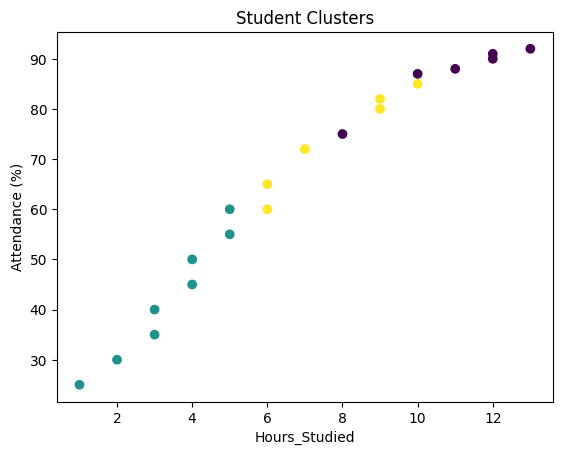

SAMPLE RECOMMENDATIONS
   Final_Exam_Score  Cluster                   Recommendation
0                78        2  On Track - Maintain Performance
1                55        1  On Track - Maintain Performance
2                88        0  On Track - Maintain Performance
3                45        1          Meet Academic Counselor
4                70        0  On Track - Maintain Performance


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# LOAD & CLEAN DATA

df = pd.read_csv("Student Success & Career Path.csv")
if "Student_ID" in df.columns:
    df = df.drop(columns=["Student_ID"])

df = df.dropna()

# REGRESSION (Predict Score)

df_encoded=pd.get_dummies(df, drop_first=True)

X_reg=df_encoded.drop(columns=["Final_Exam_Score"])
y_reg=df_encoded["Final_Exam_Score"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

y_pred_reg = reg_model.predict(X_test_reg)

print("REGRESSION RESULTS")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))
print("R2 Score:", r2_score(y_test_reg, y_pred_reg))

#  CLASSIFICATION (At Risk)

df_encoded["Risk"] = 0
df_encoded.loc[df_encoded["Final_Exam_Score"] >= 50, "Risk"] = 1

print("Class Distribution:\n", df_encoded["Risk"].value_counts())

X_clf=df_encoded.drop(columns=["Final_Exam_Score", "Risk"])
y_clf=df_encoded["Risk"]

X_train_clf, X_test_clf, y_train_clf, y_test_clf=train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

clf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

y_pred_clf = clf_model.predict(X_test_clf)

print("CLASSIFICATION RESULTS")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("Precision:", precision_score(y_test_clf, y_pred_clf, zero_division=0))
print("Recall:", recall_score(y_test_clf, y_pred_clf, zero_division=0))
print("F1 Score:", f1_score(y_test_clf, y_pred_clf, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf, labels=[0,1]))

# CLUSTERING (Study Habits)

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove("Final_Exam_Score")

X_cluster = df[numeric_cols]

scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_cluster_scaled)

print("CLUSTER DISTRIBUTION")
print(df["Cluster"].value_counts())

plt.scatter(df[numeric_cols[0]], df[numeric_cols[1]], c=df["Cluster"])
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])
plt.title("Student Clusters")
plt.show()

#RECOMMENDATION SYSTEM

def recommend(row):
    if numeric_cols[0] in row and row[numeric_cols[0]] < 2:
        return "Enroll in Study Skills Workshop"
    if numeric_cols[1] in row and row[numeric_cols[1]] < 60:
        return "Meet Academic Counselor"
    if row["Final_Exam_Score"] < 50:
        return "Extra Tutoring Required"
    return "On Track - Maintain Performance"

df["Recommendation"]=df.apply(recommend, axis=1)

print("SAMPLE RECOMMENDATIONS")
print(df[["Final_Exam_Score","Cluster","Recommendation"]].head())
